$\newcommand{\xv}{\mathbf{x}}
\newcommand{\Xv}{\mathbf{X}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\Yv}{\mathbf{Y}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Wv}{\mathbf{W}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\gv}{\mathbf{g}}
\newcommand{\Hv}{\mathbf{H}}
\newcommand{\dv}{\mathbf{d}}
\newcommand{\Vv}{\mathbf{V}}
\newcommand{\vv}{\mathbf{v}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\Tv}{\mathbf{T}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\Zv}{\mathbf{Z}}
\newcommand{\muv}{\boldsymbol{\mu}}
\newcommand{\sigmav}{\boldsymbol{\sigma}}
\newcommand{\phiv}{\boldsymbol{\phi}}
\newcommand{\Phiv}{\boldsymbol{\Phi}}
\newcommand{\Sigmav}{\boldsymbol{\Sigma}}
\newcommand{\Lambdav}{\boldsymbol{\Lambda}}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\argmax}[1]{\underset{#1}{\operatorname{argmax}}}
\newcommand{\argmin}[1]{\underset{#1}{\operatorname{argmin}}}
\newcommand{\dimensionbar}[1]{\underset{#1}{\operatorname{|}}}
$

# Optimizations in Machine Learning

*Photo and figure credit goes to Professor Chuck Anderson*

## Machine Learning Overview

### Notebook Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import IPython.display as ipd  # for display and clear_output
import time  # for sleep

import neuralnetworks as nn

### Linear Regression Model

What is Machine Learning?
At it's core, machine learning is simply modeling relationships within data using mathmatical and statistical equations. 

What some of the simplest models you can think of relating a target vale $t_N$ to an arbitrary number of features, characteristics, or attributes?

$$
g(\xv) = 0
$$

Or maybe something slightly more complext like a linear model?

$$
\begin{align*}
   g(\xv;\wv) &= w_0 + w_1 x_1 + w_2 x_2 + \cdots + w_D x_D \\
\end{align*}
$$

Which can be reduced to its matrix form that we are so familiar with in Math369.

$$
\begin{align*}
   g(\xv;\wv) &= w_0 + \sum_{i=1}^D w_i x_i \\
   & = \sum_{i=0}^D w_i x_i \mbox{, where } x_0 = 1 \\
   &= \wv^T \xv
\end{align*}
$$

Look at that! Our first machine learning model! Machine learning isn't so bad!

### Linear Regression Error and Gradient Decent

One of the simplest ways to judge a model's accuracy for a specific prediction is to square the difference between the model's predicted $t_n$ with a given set of attributes $x_n$. The entire model's accuracy can be judged by takeing the sum of each prediction's squared error and the best model can be found by minimizing this sum:
$$
    \wv_{\mbox{best}} = \argmin{\wv} \sum_{n=1}^N (t_n - g(x_n ; \wv))^2
$$

Here comes calculus! We can find the minimum by taking the derivative (gradient) of the sum setting it to zero and solving for $wv$. 

$$
\begin{align*}
\frac{\partial \sum_{n=1}^N (\tv_n - g(\xv_n;\wv))^2}{\partial \wv} &= -2 \sum_{n=1}^N (\tv_n - g(\xv_n;\wv) \frac{\partial g(\xv_n;\wv)}{\partial \wv}\\
&= -2 \sum_{n=1}^N (\tv_n - \xv_n^T \wv) \frac{\partial \xv_n^T \wv}{\partial \wv}\\
&= -2 \sum_{n=1}^N (\tv_n - \xv_n^T \wv) \xv_n^T
\end{align*}
$$


$$
\begin{align*}
\frac{\partial \sum_{n=1}^N (\tv_n - g(\xv_n;\wv))^2}{\partial \wv} 
&= -2 \sum_{n=1}^N (\tv_n - \xv_n^T \wv) \xv_n^T\\
&= -2 \Xv^T (\Tv - \Xv \wv)
\end{align*}
$$

$$
\begin{align*}
-2 \Xv^T (\Tv - \Xv \wv) &= 0\\
\Xv^T (\Tv - \Xv \wv) &= 0\\
\Xv^T \Tv &= \Xv^T \Xv \wv\\
\wv &= (\Xv^T \Xv)^{-1} \Xv^T \Tv
\end{align*}
$$

TADA!! We now how have a matrix equation of our linear regression model that solves for the smallest error using gradient decent! And in Python it's even easier! An entire model in one line of code! 

    w = np.linalg.lstsq(np.dot(X.T,X), np.dot(X.T, T))

### Path to Neural Networks

Now for something a little more interesting and involved. We can easily adapt our first model into something a little more robust that can predict multiple $t_n$ in a vector $T$ and optimize for the $k^{th}$ output. Furthermore, we can start to add non-linearity by adding non linearity to our linear model by multiplying our input characteristics/attributes $X$ by a non linear function such as: 

$$ 
\Phiv(X) = X_{1}^6 + X_{2}^5 + \ldots + X_{n}^{12}
$$
Or in matix form as: 
$$
\Phiv(X) = \Phiv\left ( 
\begin{bmatrix}
    x_{0,1} & x_{0,2} & \cdots \\
    x_{1,1} & x_{1,2} & \cdots \\
    \vdots\\
    x_{N-1,1} & x_{N-1,2} & \cdots
  \end{bmatrix}
\right ) = 
\begin{bmatrix}
    x_{0,1} & x_{0,2}^5  & x_{0,2}^3 x_{0,4}^2 & \cdots \\
    x_{1,1} & x_{1,2}^5  & x_{1,2}^3 x_{1,4}^2 & \cdots\\
    \vdots\\
    x_{N-1,1} & x_{N-1,2}^5 & x_{N-1,2}^3 x_{N-1,4}^2 & \cdots
  \end{bmatrix}
$$

$$
  \Wv = (\tilde{\Phiv}^T \tilde{\Phiv})^{-1} \tilde{\Phiv}^T T
$$


$$
\begin{align*}
  \Yv = \tilde{\Phiv} \Wv
\end{align*}
$$

Where $Y$ is our predicted output. Our complexity is slowly growing.

<img src="./Pictures/nnlinearphi.png">

The question is how do we decide what non-linear equation to use? Why don't we let the computer decide!

## Neural Networks and Error Optimization

Instead of trying to define our non-linear function $\Phiv(X)$ why donw we abstract our model into two different layers, a hidden layer that is actively attempting to optimize $\Phiv(X)$ and an output layer that produces our model's predictions.

<img src="./Pictures/nnTwoLayer.png">

$\;\;\;\; \tilde{\Xv} \;\;\;\;\;\;\;\;\;\;\;\;$ 
$\;\;\;\;\;\;\;\; \Vv \;\;\;\;\;\;\;\;\;\;\;\;$
$ \;\;\; \tilde{\Zv} \;\;\;\;\;\;\;\;\;\;\;\;$ 
$\;\;\;\;\;\;\;\; \Wv \;\;\;\;\;\;\;\;\;\;\;\;$ 
$\; \Yv \;\;\;\;\;\;\;\;\;\;\;\;$

$ N \times (D+1) \;~~$
$(D+1) \times M \;~~$
$ N \times (M+1) \;~~$
$(M+1)\times K \;~~$
$ N \times K$

$$
\begin{align*}
\tilde{\Zv} & = h(\tilde{\Xv} \Vv),\\
\Yv & = \tilde{\Zv} \Wv, \text{ or }\\
\Yv & = \tilde{h}(\tilde{\Xv} \Vv) \Wv 
\end{align*}
$$

Now $\Phiv(X)$ is represented as $h$ which represents an activation equation for an arbitrary number of input units or nodes in the hidden non-linear layer. Our input matrix $X$ is passed to each node in our hidden layer, where each node is respresented as a column in matrix $V$ produces and given an  output $Z$ matrix. The $Z$ matrix is then passed to our output layer represented as matrix $W$ and produces our outputs $Y$.

We are now ready to start to develop a gradient decent model that iteratively updates our $V$ and $W$ matrices to produce a non-linear with the least amount of error. First we need to select an activation equation where its derivative doesn't grow as $vv$ grows like polynomial functions often exhibit. Two of the most common choices are sigmoid and tangetial functions: 
  * sigmoid (asymmetric)
$$
        \begin{align*}
          h_1(a) & = \frac{1}{1+e^{-a}}
        \end{align*}
$$
  * tanh (symmetric)
$$
        \begin{align*}
          h_2(a) & = \tanh(a) = \frac{e^{a} - e^{-a}}{e^{a} + e^{-a}}
        \end{align*}
$$

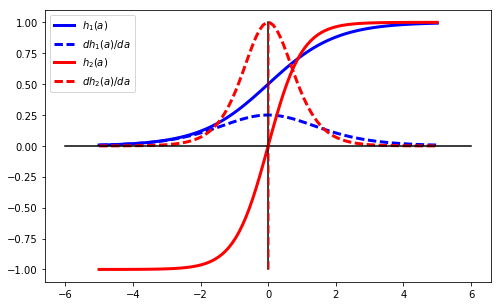

In [2]:
def h1(a):
    return 1 / (1 + np.exp(-a))

def h2(a):
    return np.tanh(a)

def dh1(a):
    y = h1(a)
    return y * (1 - y)

def dh2(a):
    y = h2(a)
    return 1 - y*y

plt.figure(figsize=(8,5))
xs = np.linspace(-5, 5, 100)
plt.plot(xs, h1(xs), 'b-', linewidth=3, label='$h_1(a)$')
plt.plot(xs, dh1(xs), 'b--', linewidth=3, label='$d h_1(a)/da$')

plt.plot(xs, h2(xs), 'r-', linewidth=3, label='$h_2(a)$')
plt.plot(xs, dh2(xs), 'r--', linewidth=3, label='$d h_2(a)/da$')

plt.plot((-6, 6), (0, 0), 'k')
plt.plot((0, 0), (-1, 1), 'k')
plt.plot([0, 0], [-1, 1], 'r--', linewidth=3, alpha=0.5)
plt.legend(loc='best');

### Gradient Descent

Like we started out for linear regression model, we first define our error based on the mean squared error between our model's prediction $y_{n,k}$ and the actual target value $t_{n,k}$: 
$$
\begin{align*}
  E &= \frac{1}{N} \frac{1}{K} \sum_{n=1}^N \sum_{k=1}^K ( t_{n,k} - y_{n,k})^2
\end{align*}
$$

But now, since our error is no longer a liner function of our input parameters, we need an iterative approach to finding the error minimum of our neural network. There are two dominant error optimizing algorithms used in machine learning: gradient descent and scaled conjugate gradient. We will first quickly derive the gradient decent and the compare it to the scaled conjugate approach. 

The gradient descent approach is based off the idea of iteratively making small changes in the negative direction to the $V$ and $W$ matrices untill we converge on an optimum error value:
$$
\begin{align*}
  v_{j,m} &\leftarrow v_{j,m} - \rho_h \frac{\partial E}{\partial v_{j,m}}\\
  w_{m,k} &\leftarrow w_{m,k} - \rho_o \frac{\partial E}{\partial w_{m,k}}
\end{align*}
$$

$\rho_h$ and $\rho_o$ are often equivalent, but can be optimized based on the dataset to improve convergence rates. However, it is important to recognizing that optimizing too soon might lead overfitting the model to a local minimum rather than a global inflection point. 

So from a higher level, we first calculated our hiddent layer $Z$ and output matrices $Y$ output using our non-linear activation $\Phiv$ matrix. Then, we calculate the error between our predicted and actual target values and pass an improvment gradient to both the $V$ and $W$ matrices. This process is iterated through until the model reaches an error threshold or converges. 


<img src="./Pictures/nnTwoLayerBackProp.png">

A full derivation can be found in the Appendix section, but after a copious use or calculus and algebra our final mathmatical equations are defined as:

$$
    \begin{align*}
      \Zv &= h(\tilde{\Xv} \Vv)\\
      \Yv &= \tilde{\Zv} \Wv\\
       \Vv & \leftarrow \Vv + \rho_h \frac{1}{N} \frac{1}{K} \tilde{\Xv}^T \left ( (\Tv - \Yv) \hat{\Wv}^T \cdot  (1-\Zv^2) \right )\\
      \Wv & \leftarrow \Wv + \rho_o \frac{1}{N}  \frac{1}{K}\tilde{\Zv}^T (\Tv - \Yv)
      \end{align*}
$$

In python this is defined as: 

    # Given input X and target T, do forward pass to calculate network output, Y
    X1 = addOnes(X)
    Z = tanh(X1 @ V))
    Z1 = addOnes(Z)
    Y = Z1 @ W
    # Do gradient descent on derivative of squared error with respect to each weight to update V and W.
    error = T - Y
    V = V + rh * X1.T @ ((error @ W[1:,:].T) * (1-Z**2))
    W = W + ro * Z1.T @ error
    
Four times the equations, four times the complexity!

### Demo Time!

Time for a demo! We will test our neural network to the function:

$$
f(x) = 0.2 + 0.05 (x+10) + 0.4 \sin(x+10)) + 0.2 \epsilon
$$

$\epsilon$ is a random noise variable that is chosen from a normal distribution from [-10,10]

In [3]:
# Make some training data
n = 20
X = np.linspace(0.,20.0,n).reshape((n,1)) - 10
T = 0.2 + 0.05 * (X+10) + 0.4 * np.sin(X+10) + 0.2 * np.random.normal(size=(n,1))

# Make some testing data
Xtest = X + 0.1*np.random.normal(size=(n,1))
Ttest = 0.2 + 0.05 * (X+10) + 0.4 * np.sin(Xtest+10) + 0.2 * np.random.normal(size=(n,1))

nSamples = X.shape[0]
nOutputs = T.shape[1]

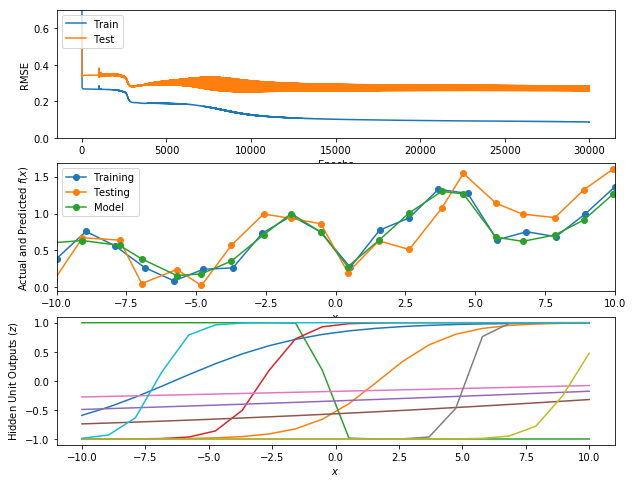

In [4]:
# Set parameters of neural network
nHiddens = 10

#rhoh = 0.5
#rhoo = 0.1

rhoh = 0.7
rhoo = 0.3

rh = rhoh / (nSamples*nOutputs)
ro = rhoo / (nSamples*nOutputs)

# Initialize weights to uniformly distributed values between small normally-distributed between -0.1 and 0.1
V = 0.1*2*(np.random.uniform(size=(1+1,nHiddens))-0.5)
W = 0.1*2*(np.random.uniform(size=(1+nHiddens,nOutputs))-0.5)

# Add constant column of 1's
def addOnes(A):
    return np.insert(A, 0, 1, axis=1)
X1 = addOnes(X)
Xtest1 = addOnes(Xtest)

# Take nReps steepest descent steps in gradient descent search in mean-squared-error function
nReps = 30000
# collect training and testing errors for plotting
errorTrace = np.zeros((nReps,2))

fig = plt.figure(figsize=(10,8))
for reps in range(nReps):

    # Forward pass on training data
    Z = np.tanh(X1 @ V)
    Z1 = addOnes(Z)
    Y = Z1 @ W

    # Error in output
    error = T - Y

    # Backward pass - the backpropagation and weight update steps
    V = V + rh * X1.T @ ( ( error @ W[1:,:].T) * (1-Z**2))
    W = W + ro * Z1.T @ error

    # error traces for plotting
    errorTrace[reps,0] = np.sqrt(np.mean((error**2)))
    Ytest = addOnes(np.tanh(Xtest1 @ V)) @ W  #!! Forward pass in one line
    errorTrace[reps,1] = np.sqrt(np.mean((Ytest-Ttest)**2))

    if reps % 1000 == 0 or reps == nReps-1:
        plt.clf()
        plt.subplot(3,1,1)
        plt.plot(errorTrace[:reps,:])
        plt.ylim(0,0.7)
        plt.xlabel('Epochs')
        plt.ylabel('RMSE')
        plt.legend(('Train','Test'),loc='upper left')
        
        plt.subplot(3,1,2)
        plt.plot(X,T,'o-',Xtest,Ttest,'o-',Xtest,Ytest,'o-')
        plt.xlim(-10,10)
        plt.legend(('Training','Testing','Model'),loc='upper left')
        plt.xlabel('$x$')
        plt.ylabel('Actual and Predicted $f(x)$')
        
        plt.subplot(3,1,3)
        plt.plot(X,Z)
        plt.ylim(-1.1,1.1)
        plt.xlabel('$x$')
        plt.ylabel('Hidden Unit Outputs ($z$)');
        
        ipd.clear_output(wait=True)
        ipd.display(fig)
ipd.clear_output(wait=True)

Pretty Cool Huh?!

## Scaled Conjugate Gradient Algorithm

### Scaling

The first derivative gives the direction our model needs to follow in the parameter space. However, since we dont know how far to go, we take a small iterative step to reduce the error and then recalculate the gradient. This leads to slower convergence. Can we optimize any faster.  

Newton had a solution to this by fitting parabolas to slightly larger step sizes and jumping to the minimum of the fitted quadratic equation. How did he do this? You guessed it Taylor series! 

$$
f(x+\Delta x) \approx \hat{f}(x+\Delta x) = f(x) + f'(x) \Delta x + \frac{1}{2} f''(x) \Delta x^2
+ \cdots
$$

Now to find the minimum of the taylor series we take the first derivative set it equal to zero and solve for $\Delta x$. 

$$
\begin{align*}
\frac{d \hat{f}(x+\Delta x)}{d\Delta x} &= f'(x) + \frac{1}{2} 2 f''(x)
\Delta x\\
& = f'(x) + f''(x) \Delta x
\end{align*}
$$

$$
\begin{align*}
0 &= f'(x) + f''(x) \Delta x\\
\Delta x &= -\frac{f'(x)}{f''(x)}
\end{align*}
$$


Example Time!
$$
f(x) = 2 x^4 + 3 x^3 + 3
$$

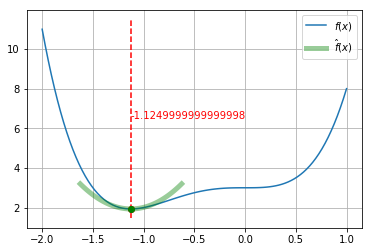

In [5]:
def f(x):
    return 2 * x**4 + 3 * x**3 + 3

def df(x): 
    return 8 * x**3 + 9 * x**2

def ddf(x):
    return 24 * x**2 + 18*x

x = -2  # our initial guess
def taylorf(x,dx):
    return f(x) + df(x) * dx + 0.5 * ddf(x) * dx**2

x = -2  # first guess at minimum

xs = np.linspace(-2,1,num=100)

fig = plt.figure()

dxs = np.linspace(-0.5,0.5,num=100)

for rep in range(10):
    time.sleep(2) # sleep 2 seconds
    plt.clf()
    plt.plot(xs,f(xs))
    plt.grid('on')
    plt.plot(x+dxs, taylorf(x,dxs),'g-',linewidth=5,alpha=0.4)
    plt.plot(x,f(x),'ro')         
    y0,y1 = plt.ylim()
    plt.plot([x,x],[y0,y1],'r--')
    
    x = x - df(x) / float(ddf(x))
    plt.plot(x,f(x),'go')
    plt.text(x,(y0+y1)*0.5,str(x),color='r')
    plt.legend(('$f(x)$','$\hat{f}(x)$'))
    
    ipd.clear_output(wait=True)
    ipd.display(fig)
ipd.clear_output(wait=True)

To expand this scaling to a solution that can handle multiple input attributes $x_{i,j}$ in a weight matrix $W$ or $V$ can can write the second derivative as a matrix comprimised of partial derivative column vectors for each weight. 

$$
\nabla_{\wv} f =
(\frac{\partial f}{\partial w_{1}}, \frac{\partial f}{\partial w_{2}},
\ldots, \frac{\partial f}{\partial w_{n}}).
$$

This is expressed as the Hessian of a matrix
$\frac{\partial^2 f}{\partial w_i \partial w_j}$

$$
\nabla^2_{\wv} f =
\begin{pmatrix}
\frac{\partial^2 f}{\partial w_1 \partial w_1} & 
\frac{\partial^2 f}{\partial w_1 \partial w_2} & 
\cdots
\frac{\partial^2 f}{\partial w_1 \partial w_n}\\
\frac{\partial^2 f}{\partial w_2 \partial w_1} & 
\frac{\partial^2 f}{\partial w_2 \partial w_2} & 
\cdots
\frac{\partial^2 f}{\partial w_2 \partial w_n}\\
\vdots \\
\frac{\partial^2 f}{\partial w_n \partial w_1} & 
\frac{\partial^2 f}{\partial w_n \partial w_2} & 
\cdots
\frac{\partial^2 f}{\partial w_n \partial w_n}
\end{pmatrix}
$$

However the Hessian is a calcualtion heavy operation and can slow down machine learning algorithms and can be approximated by assuming the error function is locally quadratic,
approximating the second derivative of the error function, and solving
for the new value of $\wv$ that would minimize the quadratic function.
A number of additional steps are taken to improve the quadratic
approximation. 

The global minimum is then found by following the orthoganal direction to the current gradient direction. This results in a zigzab pattern of steps towards the converged result. 

### Gradient Descent vs. Scaled Gradient Conjugate

Demo Time!

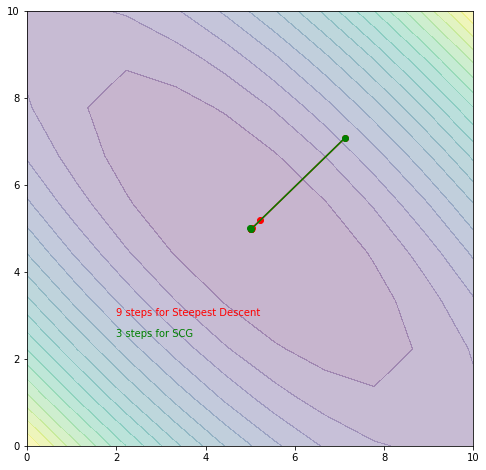

In [6]:
import scaledconjugategradient as scg

def parabola(x,xmin,s):
    d = x - xmin
    return np.dot(np.dot(d,S),d.T)

def parabolaGrad(x,xmin,s):
    d = x - xmin
    return 2 * np.dot(s,d)

f = parabola
df = parabolaGrad
center = np.array([5,5])
S = np.array([[5,4],[4,5]])

n = 10
xs = np.linspace(0,10,n)
ys = np.linspace(0,10,n)
X,Y = np.meshgrid(xs,ys)
both = np.vstack((X.flat,Y.flat)).T
nall = n*n
Z = np.zeros(nall)
for i in range(n*n):
    Z[i] = parabola(both[i,:],center,S)
Z.resize((n,n))

fig = plt.figure(figsize=(8,8))

for reps in range(10):
    time.sleep(2)
    
    firstx = np.random.uniform(0,10,2)

    resultSCG = scg.scg(firstx, f, df, center, S, xPrecision=0.001, xtracep=True)
    resultSteepest =  scg.steepest(firstx, f, df, center, S, stepsize=0.05, xPrecision=0.001, xtracep=True)

    plt.clf()
    plt.contourf(X, Y, Z, 20, alpha=0.3)
    plt.axis('tight')
    
    xt = resultSteepest['xtrace']
    plt.plot(xt[:, 0], xt[:, 1], 'ro-')

    xt = resultSCG['xtrace']
    plt.plot(xt[:, 0], xt[:, 1], 'go-')

    plt.text(2, 3, "%s steps for Steepest Descent" % resultSteepest['xtrace'].shape[0], color='red')
    plt.text(2, 2.5, "%s steps for SCG" % resultSCG['xtrace'].shape[0], color='green')
    
    ipd.clear_output(wait=True)
    ipd.display(fig)
ipd.clear_output(wait=True) 

Rosenbrock's function is often used to test optimization algorithms.
It is

$$
f(x,y) = (1-x)^2 + 100(y-x^2)^2
$$

In [7]:
def rosen(x):
    v = 100 * ((x[1] - x[0]**2)**2) + (1.0 - x[0])**2
    return v

def rosenGrad(x):
    g1 = -400 * (x[1] - x[0]**2) * x[0] - 2 * (1 - x[0])
    g2 =  200 * (x[1] - x[0]**2)
    return np.array([g1, g2])

f = rosen
df = rosenGrad

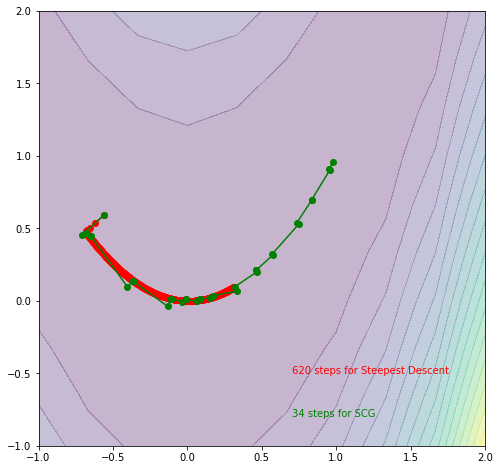

In [8]:
n = 10
xmin, xmax = -1,2
xs = np.linspace(xmin, xmax, n)
ys = np.linspace(xmin, xmax, n)
X, Y = np.meshgrid(xs, ys)
both = np.vstack((X.flat, Y.flat)).T
nall = n * n
Z = np.zeros(nall)
for i in range(n * n):
    Z[i] = f(both[i, :])
Z.resize((n, n))

fig = plt.figure(figsize=(8, 8))

for reps in range(10):
    time.sleep(2)
    
    firstx = np.random.uniform(xmin, xmax, 2)

    resultSCG = scg.scg(firstx, f, df, xPrecision=0.001, xtracep=True)
    resultSteepest =  scg.steepest(firstx, f, df, stepsize=0.001, xPrecision=0.001, xtracep=True)

    plt.clf()
    plt.contourf(X, Y, Z, 20, alpha=0.3)
    plt.axis('tight')
    
    xt = resultSteepest['xtrace']
    plt.plot(xt[: ,0], xt[:, 1], 'ro-')

    xt = resultSCG['xtrace']
    plt.plot(xt[:, 0], xt[:, 1], 'go-')

    plt.text(0.7, -0.5, "%s steps for Steepest Descent" % resultSteepest['nIterations'], color='red')
    plt.text(0.7, -0.8, "%s steps for SCG" % resultSCG['nIterations'], color='green')
    
    ipd.clear_output(wait=True)
    ipd.display(fig)
ipd.clear_output(wait=True) 

As you can see the SCG is on average much faster at converging on a minimum depending on the starting position. Now, lets try using our scaled conjugate gradient algorithm with or previous neural network example and see how it performs fitting our data.

In [9]:
# Make some training data
n = 20
X = np.linspace(0., 20.0, n).reshape((n, 1))
T = 0.2 + 0.05 * X + 0.4 * np.sin(X) + 0.2 * np.random.normal(size=(n, 1))

# Make some testing data
Xtest = X + 0.1 * np.random.normal(size=(n, 1))
Ttest = 0.2 + 0.05 * X + 0.4 * np.sin(Xtest) + 0.2 * np.random.normal(size=(n, 1))

def addOnes(A):
    return np.insert(A, 0, 1, axis=1)

In [10]:
# Set parameters of neural network
nInputs = X.shape[1]
nHiddens = 10
nOutputs = T.shape[1]

# Initialize weights to uniformly distributed values between small normally-distributed between -0.1 and 0.1
V = 0.1*2*(np.random.uniform(size=(nInputs+1, nHiddens))-0.5)
W = 0.1*2*(np.random.uniform(size=(1+nHiddens, nOutputs))-0.5)

X1 = addOnes(X)
Xtest1 = addOnes(Xtest)

### gradientDescent functions require all parameters in a vector.
def pack(V, W):
    return np.hstack((V.flat, W.flat))

def unpack(w):
    '''Assumes V, W, nInputs, nHidden, nOuputs are defined in calling context'''
    V[:] = w[:(nInputs+1)*nHiddens].reshape((nInputs+1, nHiddens))
    W[:] = w[(nInputs+1)*nHiddens:].reshape((nHiddens+1, nOutputs))

In [11]:
### Function f to be minimized
def errorFunction(w):
    unpack(w)
    # Forward pass on training data
    Y = addOnes(np.tanh(X1 @ V)) @ W
    return np.mean((T - Y)**2)

In [12]:
### Gradient of f with respect to V,W
def errorGradient(w):
    unpack(w)
    Z = np.tanh(X1 @ V)
    Z1 = addOnes(Z)
    Y = Z1 @ W
    nSamples = X1.shape[0]
    nOutputs = T.shape[1]
    error = -(T - Y) / (nSamples*nOutputs)
    dV = 2 * X1.T @ (error @ W[1:,:].T * (1-Z**2))
    dW = 2 * Z1.T @ error
    return pack(dV,dW)

In [13]:
# Initialize weights to uniformly distributed values between small normally-distributed between -0.1 and 0.1
V = 0.1*2*(np.random.uniform(size=(nInputs+1, nHiddens))-0.5)
W = 0.1*2*(np.random.uniform(size=(1+nHiddens, nOutputs))-0.5)

result = scg.scg(pack(V, W), errorFunction, errorGradient,
                        nIterations = 10000,
                        ftracep = True)
unpack(result['x'])  # copy best parameters into V and W
errorTrace = result['ftrace']
print('Ran for', len(errorTrace), 'iterations')

Ran for 10001 iterations


In [14]:
errorTrace[:10]

array([ 0.65843943,  0.18533998,  0.16211674,  0.16211674,  0.16211674,
        0.16211674,  0.16211674,  0.16211674,  0.16211674,  0.16211674])

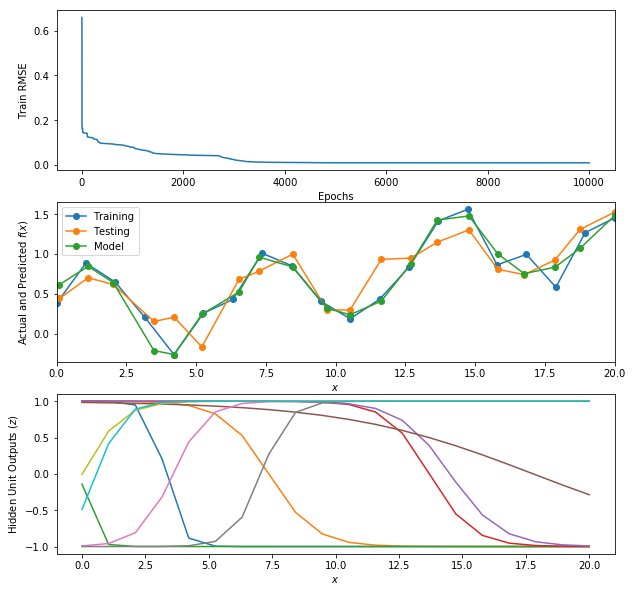

In [15]:
plt.figure(figsize=(10, 10))

plt.subplot(3, 1, 1)
plt.plot(errorTrace)
nEpochs = len(errorTrace)
plt.xlim(0 - 0.05 * nEpochs, nEpochs * 1.05)
plt.xlabel('Epochs')
plt.ylabel('Train RMSE')

plt.subplot(3, 1, 2)
Y = addOnes(np.tanh(X1 @ V)) @ W 
Ytest = addOnes(np.tanh(Xtest1 @ V)) @ W
plt.plot(X, T, 'o-', Xtest, Ttest, 'o-', Xtest, Ytest, 'o-')
plt.xlim(0, 20)
plt.legend(('Training', 'Testing', 'Model'), loc='upper left')
plt.xlabel('$x$')
plt.ylabel('Actual and Predicted $f(x)$')
        
plt.subplot(3, 1, 3)
Z = np.tanh(X1 @ V)
plt.plot(X, Z)
plt.xlabel('$x$')
plt.ylabel('Hidden Unit Outputs ($z$)');

As you can see with a 1/3 less iterations, we can acheive a high level of complexity and accuracy with a scaled conjugate gradient approach to the minimum.

## Neural Network Fun

Now we can abstract the neural network and create a clean class interface to interact with our model! 

When given a set of attributes given in a matrix $X$ and a target matrix $T$ we can define model as: 


    X = ...
    T = ...
    nnet = NeuralNetWork(1, 5, 1)  # 1 input, 5 hidden units, 1 output
    nnet.train(X, T, nIterations=100)
    Y = nnet.use(X)
    
Now we can add any number of hidden layers and inputs!

SCG stopped after 780 iterations: limit on f Precision
Final RMSE: train 0.00217203327423 test 2.84887716726


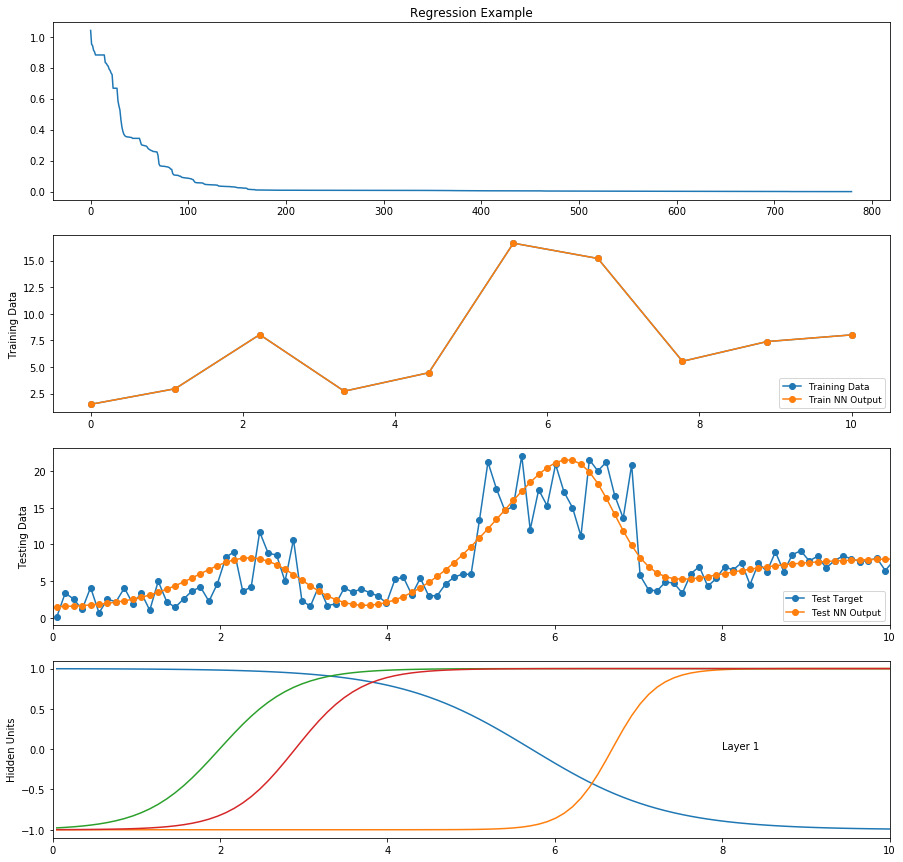

In [16]:
nSamples = 10
X = np.linspace(0, 10, nSamples).reshape((-1, 1))
T = 1.5 + 0.6 * X + 0.8 * np.sin(1.5*X)
T[np.logical_and(X > 2, X < 3)] *= 3
T[np.logical_and(X > 5, X < 7)] *= 3

nSamples = 100
Xtest = np.linspace(0, 10, nSamples).reshape((-1, 1)) + 10.0/nSamples/2
Ttest = 1.5 + 0.6 * Xtest + 0.8 * np.sin(1.5*Xtest) + np.random.uniform(-2, 2, size=(nSamples, 1))
Ttest[np.logical_and(Xtest > 2, Xtest < 3)] *= 3
Ttest[np.logical_and(Xtest > 5, Xtest < 7)] *= 3

nnet = nn.NeuralNetwork(1, 4, 1)

nnet.train(X, T, errorPrecision=1.e-10, weightPrecision=1.e-10, nIterations=1000)
print("SCG stopped after", nnet.getNumberOfIterations(), "iterations:", nnet.reason)
Y = nnet.use(X)
Ytest, Ztest = nnet.use(Xtest, allOutputs=True)
print("Final RMSE: train", np.sqrt(np.mean((Y-T)**2)), "test", np.sqrt(np.mean((Ytest-Ttest)**2)))

plt.figure(figsize=(15, 15))

nHLayers = len(nnet.nhs)
nPlotRows = 3 + nHLayers

plt.subplot(nPlotRows, 1, 1)
plt.plot(nnet.getErrors())
plt.title('Regression Example')

plt.subplot(nPlotRows, 1, 2)
plt.plot(X, T, 'o-', label='Training Data')
plt.plot(X, Y, 'o-', label='Train NN Output')
plt.ylabel('Training Data')
plt.legend(loc='lower right', prop={'size':9})

plt.subplot(nPlotRows, 1, 3)
plt.plot(Xtest, Ttest, 'o-', label='Test Target')
plt.plot(Xtest, Ytest, 'o-', label='Test NN Output')
plt.ylabel('Testing Data')
plt.xlim(0, 10)
plt.legend(loc='lower right', prop={'size':9})
for i in range(nHLayers):
    layer = nHLayers - i - 1
    plt.subplot(nPlotRows, 1, i+4)
    plt.plot(Xtest, Ztest[layer])
    plt.xlim(0,10)
    plt.ylim(-1.1,1.1)
    plt.ylabel('Hidden Units')
    plt.text(8,0, 'Layer {}'.format(layer+1))

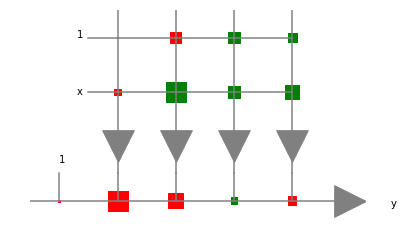

In [17]:
nnet.draw(['x'],['y'])

Interesting!! Now let's try a larger neural network!

In [18]:
nnet = nn.NeuralNetwork(1, (5, 5), 1)

SCG stopped after 1001 iterations: did not converge
Final RMSE: train 2.35290055682e-13 test 2.73403185372


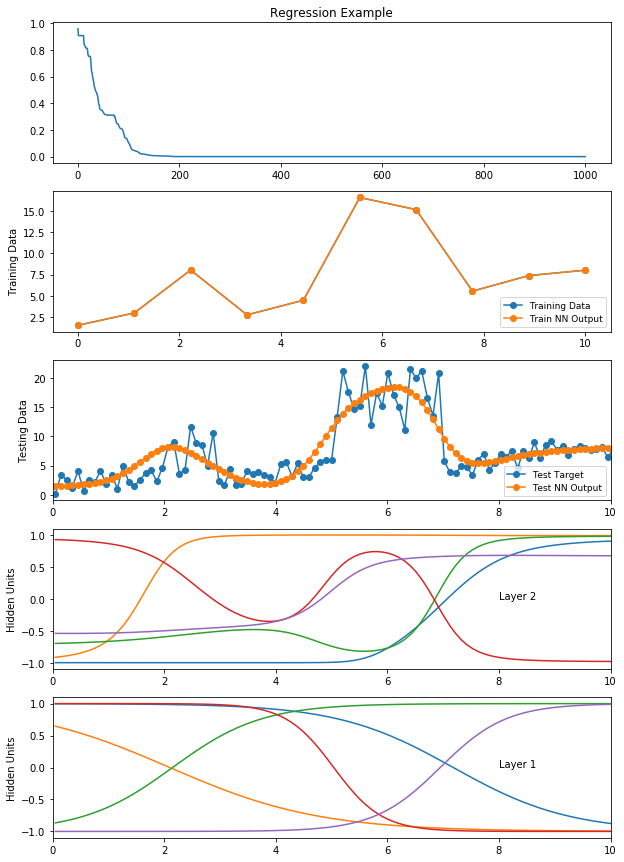

In [19]:
nnet.train(X, T, nIterations=1000) # precision not included, so defaults of zero used, which means will not terminate early
print("SCG stopped after", nnet.getNumberOfIterations(), "iterations:", nnet.reason)
Y = nnet.use(X)
Ytest, Ztest = nnet.use(Xtest, allOutputs=True)
print("Final RMSE: train", np.sqrt(np.mean((Y-T)**2)),"test", np.sqrt(np.mean((Ytest-Ttest)**2)))

plt.figure(figsize=(10, 15))

nHLayers = len(nnet.nhs)
nPlotRows = 3 + nHLayers

plt.subplot(nPlotRows, 1, 1)
plt.plot(nnet.getErrors())
plt.title('Regression Example')

plt.subplot(nPlotRows, 1, 2)
plt.plot(X, T, 'o-', label='Training Data')
plt.plot(X, Y, 'o-', label='Train NN Output')
plt.ylabel('Training Data')
plt.legend(loc='lower right', prop={'size':9})

plt.subplot(nPlotRows, 1, 3)
plt.plot(Xtest, Ttest, 'o-', label='Test Target')
plt.plot(Xtest, Ytest, 'o-', label='Test NN Output')
plt.ylabel('Testing Data')
plt.xlim(0, 10)
plt.legend(loc='lower right', prop={'size':9})
for i in range(nHLayers):
    layer = nHLayers-i-1
    plt.subplot(nPlotRows, 1, i+4)
    plt.plot(Xtest, Ztest[layer])
    plt.xlim(0, 10)
    plt.ylim(-1.1, 1.1)
    plt.ylabel('Hidden Units')
    plt.text(8, 0, 'Layer {}'.format(layer+1))

For more fun, wrap the above code in a function to make it easy to try different network structures.

In [20]:
def run(X, T, hiddenUnits, nIterations=100, verbose=False):
    if X.shape[1] != 1 or T.shape[1] != 1:
        print('This function written for one-dimensional input samples, X, and one-dimensional targets, T.')
        return
    
    nnet = nn.NeuralNetwork(1, hiddenUnits,1 )

    nnet.train(X, T, nIterations=nIterations, verbose=verbose)
    # print("SCG stopped after",nnet.getNumberOfIterations(),"iterations:",nnet.reason)
    Y = nnet.use(X)
    Ytest, Ztest = nnet.use(Xtest, allOutputs=True)
    print("Final RMSE: train", np.sqrt(np.mean((Y-T)**2)), "test", np.sqrt(np.mean((Ytest-Ttest)**2)))

    plt.figure(figsize=(10, 15))
    nHLayers = len(nnet.nhs)
    nPlotRows = 3 + nHLayers

    plt.subplot(nPlotRows, 1, 1)
    plt.plot(nnet.getErrors())
    plt.title('Regression Example')

    plt.subplot(nPlotRows, 1, 2)
    plt.plot(X, T, 'o-', label='Training Data')
    plt.plot(X, Y, 'o-', label='Train NN Output')
    plt.ylabel('Training Data')
    plt.legend(loc='lower right', prop={'size':9})

    plt.subplot(nPlotRows, 1, 3)
    plt.plot(Xtest, Ttest, 'o-', label='Test Target')
    plt.plot(Xtest, Ytest, 'o-', label='Test NN Output')
    plt.ylabel('Testing Data')
    plt.xlim(0, 10)
    plt.legend(loc='lower right', prop={'size':9})
    for i in range(nHLayers):
        layer = nHLayers-i-1
        plt.subplot(nPlotRows, 1, i+4)
        plt.plot(Xtest, Ztest[layer])
        plt.xlim(0, 10)
        plt.ylim(-1.1, 1.1)
        plt.ylabel('Hidden Units')
        plt.text(8, 0, 'Layer {}'.format(layer+1))
    return nnet

Final RMSE: train 1.57316666049 test 3.32556437892


NeuralNetwork(1, (2, 2), 1)
   Network was trained for 1001 iterations. Final error is 0.3246243298137378.

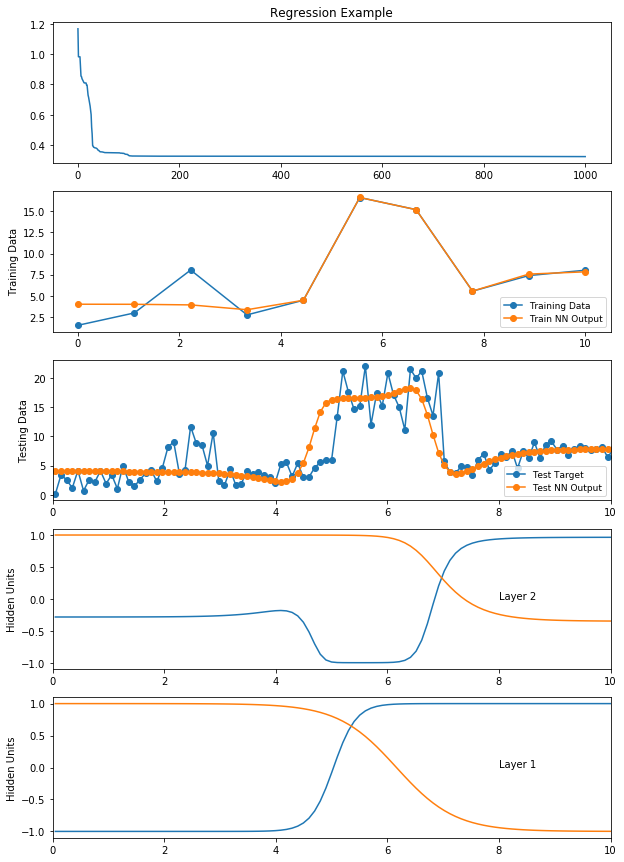

In [21]:
run(X, T, (2, 2), nIterations=1000)

Final RMSE: train 1.41590995696 test 3.93482312637


NeuralNetwork(1, (2, 2, 2, 2), 1)
   Network was trained for 1001 iterations. Final error is 0.29217427015124653.

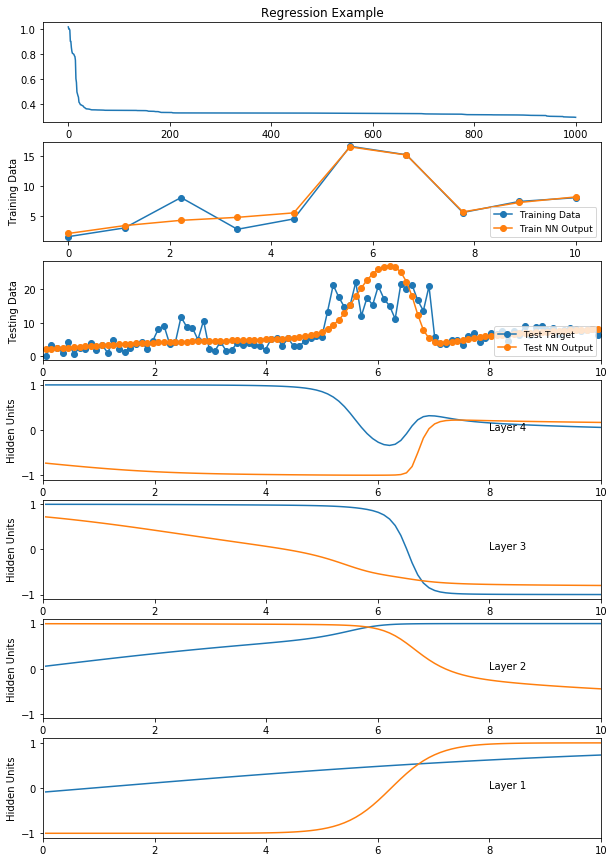

In [22]:
run(X, T, (2, 2, 2, 2), nIterations=1000)

In [23]:
[2]*6

[2, 2, 2, 2, 2, 2]

Final RMSE: train 4.82070133308e-12 test 2.88984387996


NeuralNetwork(1, [2, 2, 2, 2, 2, 2], 1)
   Network was trained for 4001 iterations. Final error is 9.947783700026297e-13.

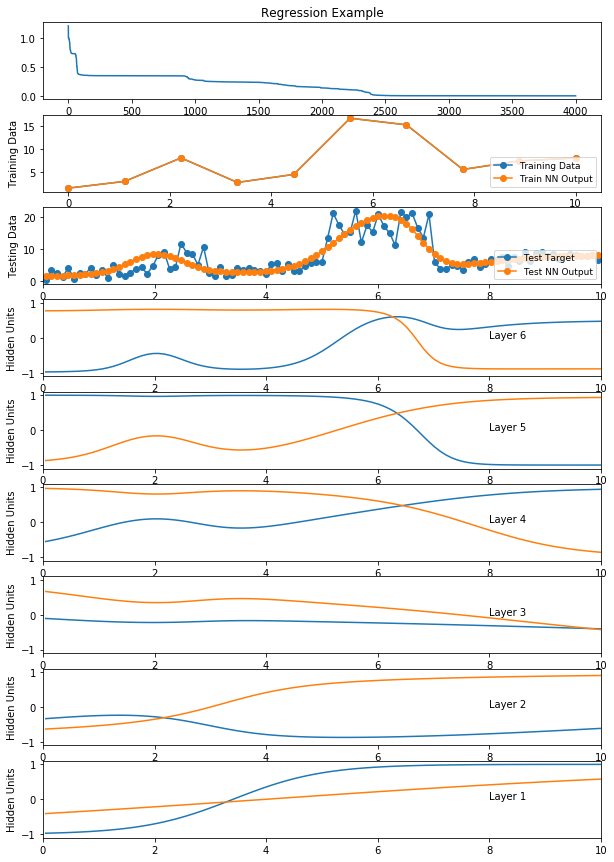

In [24]:
run(X, T, [2]*6, nIterations=4000)

SCG: Iteration 100 fValue Eval 0.531363715232 Scale 0.00110989913856
SCG: Iteration 200 fValue Eval 0.425908784153 Scale 0.000420018143229
SCG: Iteration 300 fValue Eval 0.0186222859414 Scale 3.82721905458e-11
SCG: Iteration 400 fValue Eval 0.0142837852876 Scale 1e-15
SCG: Iteration 500 fValue Eval 0.0138520288376 Scale 1.024e-12
SCG: Iteration 600 fValue Eval 0.000107565997476 Scale 1e-15
SCG: Iteration 700 fValue Eval 2.00962635427e-09 Scale 1e-15
SCG: Iteration 800 fValue Eval 8.78526973619e-14 Scale 1e-15
SCG: Iteration 900 fValue Eval 3.79766521973e-18 Scale 1e-15
SCG: Iteration 1000 fValue Eval 1.63611383823e-22 Scale 1e-15
Final RMSE: train 6.19869389744e-11 test 3.33552816219


NeuralNetwork(1, [50 10  3  1  3 10 50], 1)
   Network was trained for 1001 iterations. Final error is 1.2791066563139981e-11.

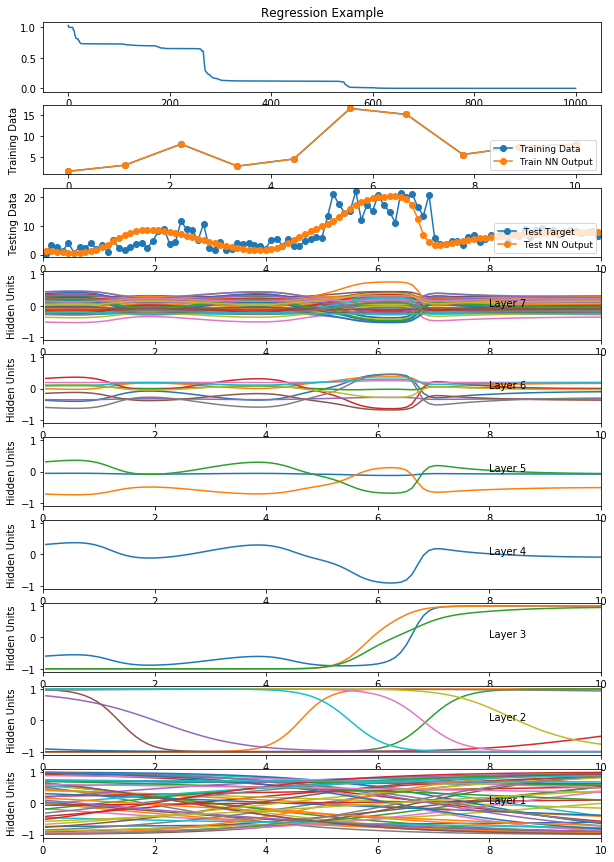

In [25]:
nnet = run(X, T, np.array([50,10,3,1,3,10,50]) * 1, nIterations=1000, verbose=True)
nnet

Run the above cell several times to see very different solutions as observed in the pattern of hidden layer outputs.

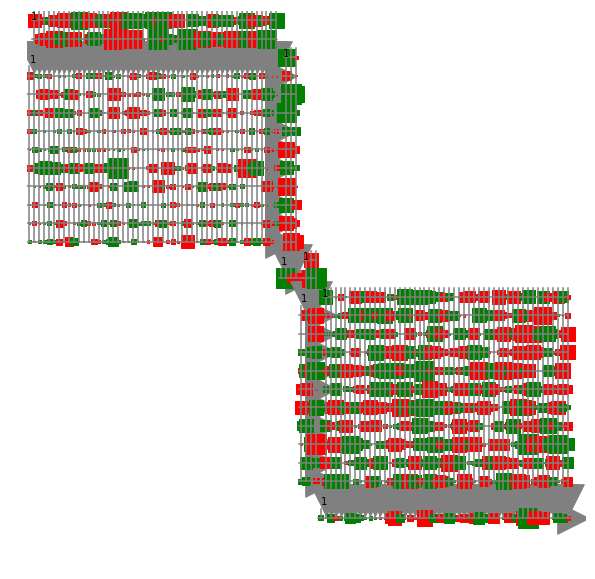

In [26]:
plt.figure(figsize=(10, 10))
nnet.draw()

# Appendix

### Neural Network Derivation

Forward calculation (ignoring constant 1 input and all other terms)

$$
\begin{align*}
  y &= w\; h(v\;x) \text{ or }\\
  y &= w\; z\\
  z &= h(a)\\
  a &= v\; x
\end{align*}
$$

Since $E = (t - y)^2$

$$
\begin{align*}
  \frac{\partial E}{\partial v} & = \frac{\partial (t - y)^2}{\partial v}
\end{align*}
$$

The Chain Rule to the rescue.

$$
\begin{align*}
  \frac{\partial E}{\partial v} & = \frac{\partial (t-y)^2}{\partial v}\\
  & = \frac{\partial (t-y)^2}{\partial y} \frac{\partial y}{\partial z} \frac{\partial z}{\partial a} \frac{\partial a}{\partial v} \\
  & = 2(t-y) \;\;(-1)\;\; w \;\;  \frac{\partial h(a)}{\partial a} \;\; x \\
\end{align*}
$$

If $h(a) = \tanh(a)$, then $\frac{\partial h(a)}{\partial a} = (1-h(a)^2) = (1-z^2)$. See [this page at Mathematics Stack Exchange](http://math.stackexchange.com/questions/741050/hyperbolic-functions-derivative-of-tanh-x).

$$
\begin{align*}
  \frac{\partial E}{\partial v} & = -2(t-y) \;\; w \;\;  \frac{\partial h(a)}{\partial a} \;\; x \\
  & = -2(t-y) \;\; w \;\;  (1-z^2) \;\; x
\end{align*}
$$

Let's add another output.

The Chain Rule again.

$$
       \begin{align*}
       \frac{\partial E}{\partial v} & = \frac{\partial (t_1-y_1)^2 + (t_2-y_2)^2}{\partial v}\\
       & = \frac{\partial (t_1-y_1)^2 + (t_2-y_2)^2}{\partial z} \frac{\partial z}{\partial a} \frac{\partial a}{\partial v} \\
       & = \left ( \frac{\partial (t_1-y_1)^2 + (t_2-y_2)^2}{\partial y_1}\frac{\partial y_1}{\partial z} + \frac{\partial (y_1-t_1)^2 + (y_2-t_2)^2}{\partial y_2}\frac{\partial
           y_2}{\partial z} \right )  \frac{\partial z}{\partial a} \frac{\partial a}{\partial v} \\
       & = \left ( -2(t_1-y_1) w_1 - 2(t_2 -y_2) w_2 \right ) \frac{\partial z}{\partial a} \frac{\partial a}{\partial v} \\
       & = -2 \left ( (t_1-y_1) w_1 + (t_2-y_2) w_2 \right ) \frac{\partial h(a)}{\partial a} x \\
       & = -2 \left ( (t_1-y_1) w_1 + (t_2-y_2) w_2 \right ) (1-z^2) x 
       \end{align*}
$$

Think of the errors calculated in the output units as being sent backwards to the units in the previous layer.  If we label these errors as "delta" values, our derivative expressions form what are commonly referred to as "delta rules".  The delta values are "backpropagated" to the previous layer.  This process is called "error backpropagation", but is really just the chain rule of calculating derivatives!

First, remember these derivatives.

$$
       \begin{align*}
       \frac{\partial E}{\partial v} & = -2 ( (t_1-y_1) w_1 + (t_2-y_2) w_2  ) (1-z^2) x \\
       \frac{\partial E}{\partial w_1} & = -2 (t_1-y_1) z
       \end{align*}
$$

Now the update rules involving the deltas ($\delta$) are 

$$
       \begin{align*}
       w &\leftarrow w - \frac{\partial E}{\partial w_1}\\
       &\leftarrow w + \rho_o  (t_1-y_1) z\\
       &\leftarrow w + \rho_o  \delta_1^{(o)}  z\\
       v & \leftarrow v - \frac{\partial E}{\partial v}\\
       & \leftarrow v + \rho_h \left ( (t_1-y_1) w_1 + (t_2-y_2) w_2 \right ) (1-z^2) x \\
       & \leftarrow v + \rho_h \left ( (t_1-y_1) w_1 + (t_2-y_2) w_2 \right ) (1-z^2) x \\
       & \leftarrow v + \rho_h \left ( \delta_1^{(o)} w_1 + \delta_2^{(o)} w_2 \right ) (1-z^2) x \\
       & \leftarrow v + \rho_h \delta^{(h)} x\\
&\;\;\; \text{ where } \delta^{(h)} =  ( \delta_1^{(o)} w_1 + \delta_2^{(o)} w_2  ) (1-z^2)
       \end{align*}
$$

$$
\begin{align*}
  v_{j,m} &\leftarrow v_{j,m} - \rho_h \frac{\partial E}{\partial
    v_{j,m}}\\
 w_{m,k} & \leftarrow w_{m,k} - \rho_o \frac{\partial E}{\partial w_{m,k}}
\end{align*}
$$

A bit of calculus and algebra lead us to these expressions for doing gradient descent.

$$
\begin{align*}
  v_{j,m} &\leftarrow v_{j,m} + \rho_h \frac{1}{N} \frac{1}{K} \sum_{n=1}^N \sum_{k=1}^K (t_{n,k} - y_{n,k}) w_{m,k} (1-\tilde{z}_m^2) \tilde{x}_{n,j}\\
  w_{m,k} &\leftarrow w_{m,k} + \rho_o \frac{1}{N}  \frac{1}{K} \sum_{n=1}^N
  (t_{n,k} - y_{n,k}) \tilde{z}_m
\end{align*}
$$

Now we will derive this result.
First work on $\frac{\partial E}{\partial w_{m,k}}$.

$$
\begin{align*}
  E &= \frac{1}{N} \frac{1}{K} \sum_{n=1}^N \sum_{k=1}^K (t_{n,k} - y_{n,k})^2\\
  \frac{\partial E}{\partial w_{m,k}} & = -2 \frac{1}{N} \frac{1}{K} \sum_{n=1}^N \sum_{k'=1}^K (t_{n,k'} - y_{n,k'}) \frac{\partial y_{n,k'}}{\partial w_{m,k}}\\
  \text{Since } & y_{n,k'} = \sum_{m'=0}^M  w_{m',k'} \tilde{z}_{n,m'}\\
  \frac{\partial E}{\partial w_{m,k}} & = -2 \frac{1}{N} \frac{1}{K} \sum_{n=1}^N \sum_{k'=1}^K (t_{n,k'} - y_{n,k'}) 
  \frac{\partial \left ( \sum_{m'=0}^M w_{m',k'} \tilde{z}_{n,m'}  \right )}{\partial w_{m,k}}\\
  & = -2 \frac{1}{N} \frac{1}{K} \sum_{n=1}^N (t_{n,k} - y_{n,k}) \tilde{z}_{n,m}
\end{align*}
$$

Now the hard one,  $\frac{\partial E}{\partial v_{j,m}}$.

$$
\begin{align*}
  E &= \frac{1}{N} \frac{1}{K} \sum_{n=1}^N \sum_{k=1}^K (t_{n,k} - y_{n,k})^2\\
  \frac{\partial E}{\partial v_{j,m}} & = -2 \frac{1}{N} \frac{1}{K} \sum_{n=1}^N \sum_{k'=1}^K (t_{n,k'} - y_{n,k'}) \frac{\partial y_{n,k'}}{\partial  v_{j,m}}
\end{align*}
$$

Knowing that 

$$
\begin{align*}
  y_{n,k'} & = \sum_{m'=0}^M  w_{m',k'} \tilde{z}_{n,m'}\\
  &  = \sum_{m'=0}^M  w_{m',k'} \tilde{h}\left ( \sum_{j'=0}^D
    v_{j,m'} \tilde{x}_{n,j'} \right )
\end{align*}
$$

we can continue.

$$
\begin{align*}
  \frac{\partial E}{\partial v_{j,m}} & = -2 \frac{1}{N} \frac{1}{K} \sum_{n=1}^N \sum_{k'=1}^K (t_{n,k'} - y_{n,k'}) 
  \frac{\partial \left ( \sum_{m'=0}^M  w_{m',k'} \tilde{h} \left ( \sum_{j'=0}^D v_{j',m'} \tilde{x}_{n,j'} \right ) \right )}{\partial v_{j,m}}\\ 
  \text{Let } a_{n,m'} & = \tilde{h} \left ( \sum_{j'=0}^D v_{j',m'} \tilde{x}_{n,j'}  \right )\\
  \frac{\partial E}{\partial v_{j,m}} & = -2 \frac{1}{N} \frac{1}{K} \sum_{n=1}^N \sum_{k'=1}^K (t_{n,k'} - y_{n,k'})  \sum_{m'=0}^M  w_{m',k'} 
  \frac{\partial \tilde{h}(a_{n,m'})}{\partial  a_{n,m'}} \frac{\partial a_{n,m'}}{\partial v_{j,m}}\\
  & = -2 \frac{1}{N} \frac{1}{K} \sum_{n=1}^N \sum_{k'=1}^K (t_{n,k'} - y_{n,k'})  \sum_{m'=0}^M  w_{m',k'} \frac{\partial \tilde{h}(a_{n,m'})}{\partial a_{n,m'}} \tilde{x}_{n,j}
\end{align*}
$$

To summarize:

$$
    \begin{align*}
      E &= \frac{1}{N} \frac{1}{K} \sum_{n=1}^N \sum_{k=1}^K (t_{n,k} - y_{n,k})^2\\
      \frac{\partial E}{\partial w_{m,k}} & = -2 \frac{1}{N}  \frac{1}{K}
       \sum_{n=1}^N (t_{n,k} - y_{n,k}) \tilde{z}_{n,m}\\
      \frac{\partial E}{\partial v_{j,m}} & = -2 \frac{1}{N} \frac{1}{K} \sum_{n=1}^N \sum_{k=1}^K (t_{n,k} - y_{n,k})   w_{m,k} (1-z_{n,m}^2) \tilde{x}_{n,j}
    \end{align*}
$$

Forward pass

$$
    \begin{align*}
      z_{n,m} &= h(\sum_{j=0}^D v_{j,m} \tilde{x}_{n,j})\\
      y_{n,k} &= \sum_{m=1}^M w_{m,k} \tilde{z}_{n,m}
    \end{align*}
$$

Backward pass

$$
\begin{align*}
      v_{j,m} & \leftarrow v_{j,m} + \rho_h \frac{1}{N} \frac{1}{K} \sum_{n=1}^N \sum_{k=1}^K (t_{n,k} - y_{n,k})   w_{m,k} (1-z_{n,m}^2) \tilde{x}_{n,j}\\
 w_{m,k} & \leftarrow w_{m,k} + \rho_o \frac{1}{N}  \frac{1}{K}  \sum_{n=1}^N (t_{n,k} - y_{n,k}) \tilde{z}_{n,m}
    \end{align*}
$$

Convert these scalar expressions to matrix expressions.

Forward Pass

$$
    \begin{align*}
      z_{n,m} &= h(\sum_{j=0}^D v_{j,m} \tilde{x}_{n,j})\\
      z_{n,m} &= h( v_{*,m} \tilde{x}_{n,*})\\
      z_{n,m} &= h(  \tilde{x}_{n,*} v_{*,m})\\
      z_{*_n,m} &= h(  \tilde{x}_{*_n,*} v_{*,m})\\
      z_{*_n,*_m} &= h(  \tilde{x}_{*_n,*} v_{*,*_m})\\
      \Zv &= h(\tilde{\Xv} \Vv)\\
      y_{n,k} &= \sum_{m=1}^M w_{m,k} \tilde{z}_{n,m}\\
      y_{n,k} &=  \tilde{z}_{n,*} w_{*,k}\\
      y_{*_n,*_k} &=  \tilde{z}_{*_n,*} w_{*,*_k}\\
      \Yv &= \tilde{\Zv} \Wv
    \end{align*}
$$

Backward Pass for $\Vv$

$$
    \begin{align*}
      v_{j,m} & \leftarrow v_{j,m} + \rho_h \frac{1}{N} \frac{1}{K} \sum_{n=1}^N \sum_{k=1}^K (t_{n,k} - y_{n,k})   w_{m,k} (1-z_{n,m}^2) \tilde{x}_{n,j}\\
      v_{j,m} & \leftarrow v_{j,m} + \rho_h \frac{1}{N} \frac{1}{K} \sum_{n=1}^N  (t_{n,*_k} - y_{n,*_k}) w_{m,*_k}^T   (1-z_{n,m}^2) \tilde{x}_{n,j}\\
      v_{j,m} & \leftarrow v_{j,m} + \rho_h \frac{1}{N} \frac{1}{K} \left ( (t_{*_n,*_k} - y_{*_n,*_k}) w_{m,*_k}^T \cdot  (1-z_{*_n,m}^2) \dimensionbar{N\times m} \right )^T
      \tilde{x}_{*_n,j} 
\end{align*}
$$

Almost.  Result on right hand side has subscripts $m,j$, but left side is $j,m$. So

$$
    \begin{align*}
      v_{j,m} & \leftarrow v_{j,m} + \rho_h \frac{1}{N} \frac{1}{K} \left ( \left ( (t_{*_n,*_k} - y_{*_n,*_k}) w_{m,*_k}^T \cdot  (1-z_{*_n,m}^2) \right )^T
      \tilde{x}_{*_n,j} \right )^T\\
       & \leftarrow v_{j,m} + \rho_h \frac{1}{N} \frac{1}{K} \tilde{x}_{*_n,j}^T \left ( (t_{*_n,*_k} - y_{*_n,*_k}) w_{m,*_k}^T \cdot  (1-z_{*_n,m}^2) \right )\\
       v_{*_j,*_m} & \leftarrow v_{*_j,*_m} + \rho_h \frac{1}{N} \frac{1}{K} \tilde{x}_{*_n,*_j}^T \left ( (t_{*_n,*_k} - y_{*_n,*_k}) w_{*_m,*_k}^T \cdot  (1-z_{*_n,*_m}^2)
       \right )\\
       \Vv & \leftarrow \Vv + \rho_h \frac{1}{N} \frac{1}{K} \tilde{\Xv}^T \left ( (\Tv - \Yv) \hat{\Wv}^T \cdot  (1-\Zv^2) \right )\\
       \Vv & \leftarrow \Vv + \rho_h \frac{1}{N} \frac{1}{K} \tilde{\Xv}^T \dimensionbar{D\times N} \left ( (\Tv - \Yv) \dimensionbar{N\times K} \hat{\Wv}^T \dimensionbar{N\times M} \cdot  (1-\Zv^2)
         \dimensionbar{N\times M}\right ) \dimensionbar{D\times M}\\
       \text{where } & \hat{\Wv} \text{ is } \Wv \text{ without constant input row}
\end{align*}
$$


Backward Pass for $\Wv$

$$
    \begin{align*}
      w_{m,k} & \leftarrow w_{m,k} + \rho_o \frac{1}{N}  \frac{1}{K} \sum_{n=1}^N (t_{n,k} - y_{n,k}) \tilde{z}_{n,m}\\
      & \leftarrow w_{m,k} + \rho_o \frac{1}{N}  \frac{1}{K} (t_{*_n,k} - y_{*_n,k})^T \tilde{z}_{*_n,m}
    \end{align*}
$$

Again, almost.  Result on right hand side has subscripts $k,m$ but need $m,k$. So

$$
    \begin{align*}
      w_{m,k} & \leftarrow w_{m,k} + \rho_o \frac{1}{N} \frac{1}{K}   \left ( (t_{*_n,k} - y_{*_n,k})^T \tilde{z}_{*_n,m} \right )^T\\
       & \leftarrow w_{m,k} + \rho_o \frac{1}{N} \frac{1}{K} \tilde{z}_{*_n,m}^T (t_{*_n,k} - y_{*_n,k}) \\
      w_{*_m,*_k} & \leftarrow w_{*_m,*_k} + \rho_o \frac{1}{N} \frac{1}{K}  \tilde{z}_{*_n,*_m}^T (t_{*_n,*_k} - y_{*_n,*_k}) \\
      \Wv & \leftarrow \Wv + \rho_o \frac{1}{N} \frac{1}{K}  \tilde{\Zv}^T (\Tv - \Yv)\\
      \Wv & \leftarrow \Wv + \rho_o \frac{1}{N} \frac{1}{K}  \tilde{\Zv}^T \dimensionbar{M\times N} (\Tv - \Yv \dimensionbar{N\times K}) \dimensionbar{M\times K}
    \end{align*}
$$

All together now, first in math.

$$
    \begin{align*}
      \Zv &= h(\tilde{\Xv} \Vv)\\
      \Yv &= \tilde{\Zv} \Wv\\
       \Vv & \leftarrow \Vv + \rho_h \frac{1}{N} \frac{1}{K} \tilde{\Xv}^T \left ( (\Tv - \Yv) \hat{\Wv}^T \cdot  (1-\Zv^2) \right )\\
      \Wv & \leftarrow \Wv + \rho_o \frac{1}{N}  \frac{1}{K}\tilde{\Zv}^T (\Tv - \Yv)
      \end{align*}
$$

Now in python.

    # Given input X and target T, do forward pass to calculate network output, Y
    X1 = addOnes(X)
    Z = tanh(X1 @ V))
    Z1 = addOnes(Z)
    Y = Z1 @ W
    # Do gradient descent on derivative of squared error with respect to each weight to update V and W.
    error = T - Y
    V = V + rh * X1.T @ ((error @ W[1:,:].T) * (1-Z**2))
    W = W + ro * Z1.T @ error

## Scaled Conjugate Derivation

Let $E(\wv)$ be the error function (mean square error over training samples) we wish to minimize by
findig the best $\wv$. Steepest descent will find new $\wv$ by
minimizing $E(\wv)$ in successive directions $\dv_0, \dv_1, \ldots$
for which $\dv_i^T \dv_j = 0$ for $i \neq j$.  In other words, the
search directions are orthogonal to each other, resulting in a zig-zag
pattern of steps, some of which are in the same directions.  

Another problem with orthogonal directions is that forcing the second
direction, for example, to be orthogonal to the first will not be in
the direction of the minimum unless the error function is quadratic
and its contours are circles.

We would rather choose a new direction based on the previous ones and
on the curvature, or second derivative, of the error function at the
current $\wv$.

Say we have picked a direction, $\dv_i$, at Step $i$  and we have
picked a scalar $\alpha$ that minimizes the error in that direction,
so the new value of $\wv$ is $\wv_{i+1} = \wv_i + \alpha \dv_i$.
Since $E(\wv_{i+1})$ is minimized, we know

$$
\begin{align*}
\frac{d}{d\alpha} E(\wv_{i+1}) &= 0\\
\end{align*}
$$

and

$$
\begin{align*}
\frac{d}{d\alpha} E(\wv_{i+1}) &= \frac{d}{d\wv_{i+1}} E(\wv_{i+1}) \frac{d}{d\alpha} \wv_{i+1}\\
& = E'(\wv_{i+1})^T \dv_i\\
& = 0
\end{align*}
$$

Now, after minimizing along any new direction $\dv_j$ to get
$\wv_{j+1}$ we want

$$
E'(\wv_{j+1})^T \dv_i = 0
$$

We can derive what the new directions should be by the following
steps.  First, let's approximate $E(\wv_{j+1})$ with a second-order
Taylor series expansion.

$$
\begin{align*}
E(\wv_{j+1}) & = E(\wv_j + \alpha_j \dv_j)\\
& \approx E(\wv_j) + \alpha_j \dv_j^T E'(\wv_j) + \frac{1}{2}
\alpha_j^2 \dv_j^T E''(\wv_j)\dv_j
\end{align*}
$$

We can differentiate this to get

$$
\begin{align*}
E'(\wv_{j+1})  \approx E'(\wv_j) + \alpha_j  E''(\wv_j) \dv_j
\end{align*}
$$

We want

$$
\begin{align*}
E'(\wv_{j+1})^T \dv_i = 0
\end{align*}
$$

which can now be rewritten as

$$
\begin{align*}
\left (E'(\wv_j) + \alpha_j E''(\wv_j) \dv_j \right )^T \dv_i &= 0\\
E'(\wv_j)^T \dv_i + \dv_j^T \alpha_j E''(\wv_j) \dv_i &= 0\\
\end{align*}
$$

Since we want the first term to be 0,

$$
\begin{align*}
\dv_j^T E''(\wv_j) \dv_i &= 0
\end{align*}
$$

Directions $\dv_j$ and $\dv_i$ for which this condition holds are said
to be mutually conjugate with respect to the second derivative of the
error function.

Now we need a procedure for picking successive directions that meet
this condition.

   1. Use the initial weight vector $\wv_0$ and derivative (gradient) of the error function to select the first direction.
$$
\begin{align}
\gv_0 & = -E'(\wv_0)\\
\dv_0 & = \gv_0\\
k &= 0
\end{align}
$$
   2. Do line search to find best $\alpha_k$ and new $\wv_{k+1}$.
$$\begin{align}
\alpha_k &= \argmin{\alpha} E(\wv_k + \alpha \dv_k)\\
\wv_{k+1} &= \wv_k + \alpha_k \dv_k\\
\end{align}
$$
   3. Calculate new gradient of error function.
$$
\begin{align}
\gv_{k+1} &= -E'(\wv_{k+1})
\end{align}
$$
   4. Form new direction from combination of previous direction and new gradient, or reset.
$$
\begin{align}
\text{if } k \text{ mod } D = 0, & \text{then}\\
&\dv_{k+1} = \gv_{k+1}\\
\text{else} &\\
&\beta_k = \frac{|\gv_{k+1}|^2 - \gv_{k+1}^T \gv_k}{|\gv_k|^2}\\
&\dv_{k+1} = \gv_{k+1} + \beta_k \dv_k\\
\end{align}
$$
   5. Update $k = k + 1$ and repeat at Step 2 or terminate.

Notice that $E''(\wv)$ does not have to be calculated.

Step 2 involves a minimization search along the line $\wv_k + \alpha
\dv_k$.  The Scaled Conjugate Gradient (SCG) algorithm,
[Efficient
Training of Feed-Forward Neural Networks, by Moller](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.50.8063&rep=rep1&type=pdf), replaces this
line search by assuming the error function is locally quadratic,
approximating the second derivative of the error function, and solving
for the new value of $\wv$ that would minimize the quadratic function.
A number of additional steps are taken to improve the quadratic
approximation.

The new value of $\wv$ is found by the following procedure.  Again,
we use the Taylor series expansion of the error function

$$
\begin{align*}
E(\wv_{j+1}) & = E(\wv_j + \alpha_j \dv_j)\\
& \approx E(\wv_j) + \alpha_j \dv_j^T E'(\wv_j) + \frac{1}{2}
\alpha_j^2 \dv_j^T E''(\wv_j)\dv_j
\end{align*}
$$

but this time we take the derivative with respect to $\alpha$.

$$
\begin{align*}
\frac{d}{d\alpha_j} E(\wv_{j+1}) & \approx  \dv_j^T E'(\wv_j) + 
\alpha_j \dv_j^T E''(\wv_j)\dv_j
\end{align*}
$$

We set this equal to zero and solve for $\alpha_j$.

$$
\alpha_j = \frac{- \dv_j^T E'(\wv_j)}{\dv_j^T E''(\wv_j)\dv_j}
$$

$E''(\wv)$ must be positive definite for the second-order approximation
to be a bowl with a valid minimum.  SCG follows the same approach as
the Levenberg-Marquardt method for forcing this by adding $\lambda_k
I$ to $E''(\wv)$ and adjusting $\lambda_k$ according to good the
second-order approximation is of the error function.

Rather than calculating $E''(\wv_k)$, SCG approximates $E''(\wv_k)
\dv_k$ by

$$
\begin{align*}
E''(\wv_k) \dv_k &\approx \frac{E'(\wv_k + \sigma_k \dv_k) -
E'(\wv_k)}{\sigma_k}\\
\sigma_k &= \frac{\epsilon}{|\dv_k|^2}
\end{align*}
$$
for $\epsilon$ a small positive constant.